In [55]:
# 导入一些常用包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

#解决中文显示问题，Mac
%matplotlib inline
from matplotlib.font_manager import FontProperties

plt.rcParams['figure.figsize'] = (10.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文

## 01 特征理解

In [2]:
# 引入第 1 个数据集 Salary_Ranges_by_Job_Classification
salary_ranges = pd.read_csv('./data/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


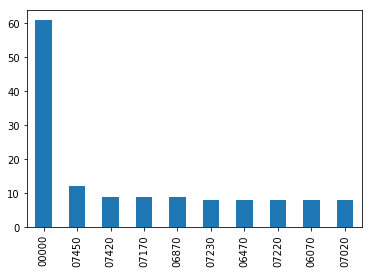

In [10]:
# 绘制条形图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

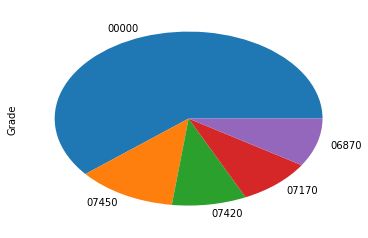

In [9]:
# 绘制饼图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

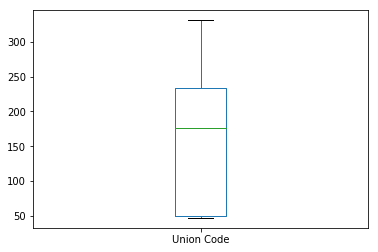

In [13]:
# 绘制箱体图
salary_ranges['Union Code'].value_counts().sort_values(ascending=False).head(5).plot(kind='box')

In [26]:
# 引入第 2 个数据集
climate = pd.read_csv('./data/GlobalLandTemperaturesByCity.csv')
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [31]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235082 entries, 0 to 8599210
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 502.6+ MB


In [30]:
# 查看字段的基本统计情况（只会显示数值型变量）
climate.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [27]:
# 移除缺失值
climate.dropna(axis=0, inplace=True)

# 检查缺失个数
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [28]:
# 枚举所有变量值的数量
climate['AverageTemperature'].nunique()

111994

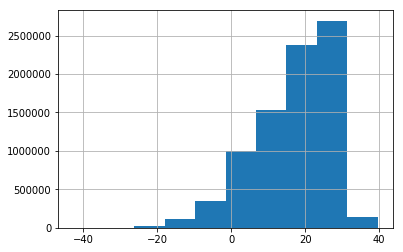

In [29]:
# 绘制直方图
climate['AverageTemperature'].hist()

In [34]:
# 日期转换, 将dt 转换为日期，取年份, 注意map的用法
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

# 只看中国
climate_sub_china = climate.loc[climate['Country'] == 'China']
climate_sub_china['Century'] = climate_sub_china['year'].map(lambda x:int(x/100 +1))
climate_sub_china.head()

/Users/yongsenlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,Century
11925,1820-08-01,20.146,2.286,Ürümqi,China,44.20N,87.20E,1820,19
11926,1820-09-01,15.331,1.775,Ürümqi,China,44.20N,87.20E,1820,19
11927,1820-10-01,5.256,1.848,Ürümqi,China,44.20N,87.20E,1820,19
11928,1820-11-01,-4.956,2.190,Ürümqi,China,44.20N,87.20E,1820,19
11929,1820-12-01,-14.118,2.581,Ürümqi,China,44.20N,87.20E,1820,19


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e028b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e2def28>]], dtype=object)

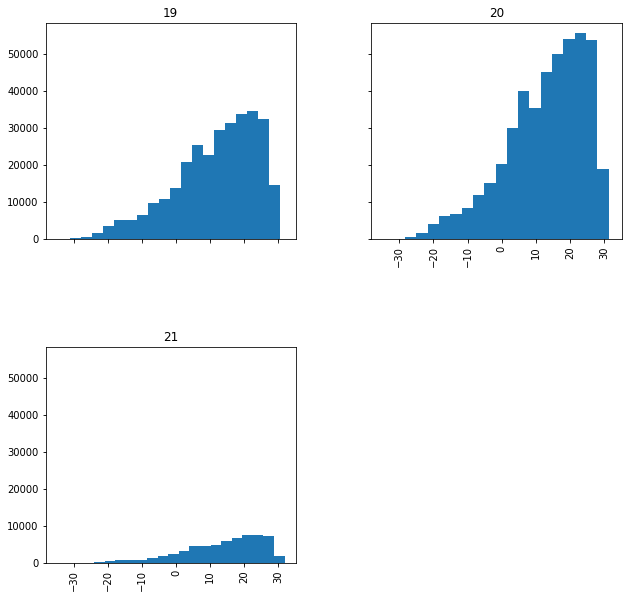

In [36]:
# 为每个世纪（Century）绘制平均温度的直方图
climate_sub_china['AverageTemperature'].hist(by=climate_sub_china['Century'],
                                            sharex=True,
                                            sharey=True,
                                            figsize=(10, 10),
                                            bins=20)

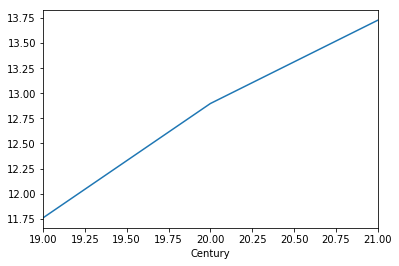

In [37]:
# 按世纪来分组计算温度的均值
climate_sub_china.groupby('Century')['AverageTemperature'].mean().plot(kind='line')

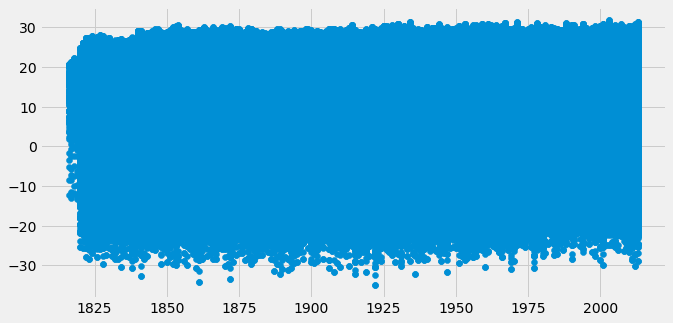

In [41]:
# 绘制散点图
x = climate_sub_china['year']
y = climate_sub_china['AverageTemperature']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

## 02 特征增强

In [46]:
# 引入第 3 个数据集(皮马印第安人糖尿病预测数据集)
pima_columns = ['times_pregment','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness',
                'serum_insulin','bmi','pedigree_function','age','onset_disbetes']

pima = pd.read_csv('./data/pima.data', names=pima_columns)
pima.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregment                  768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_disbetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
pima.describe()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# 处理被错误填充的缺失值0，还原为 空(单独处理)
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x !=0 else None)
# 检查变量缺失情况
pima['serum_insulin'].isnull().sum()


# 批量操作 还原缺失值
columns = ['serum_insulin','bmi','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness']

for col in columns:
    pima[col].replace([0], [None], inplace=True)

# 检查变量缺失情况
pima.isnull().sum()

times_pregment                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_disbetes                    0
dtype: int64

In [52]:
# 删除含有缺失值的行
pima_dropped = pima.dropna()
num_rows_lost = round(100*((pima.shape[0]-pima_dropped.shape[0])/pima.shape[0]))
print("保留了原先 {}% 的行".format(num_rows_lost))

保留了原先 49% 的行


Text(0,0.5,'% change')

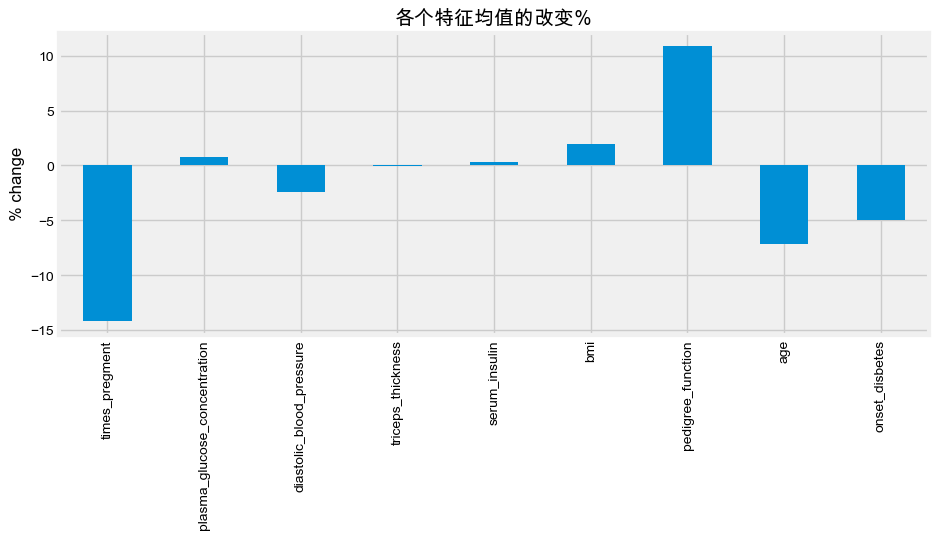

In [59]:
# 查看下 删除行 之后，各个特征均值的差异
ax = (100*(pima_dropped.mean()-pima.mean())/pima.mean()).plot(kind='bar', title='各个特征均值的改变%')
ax.set_ylabel('% change')

In [71]:
# 使用sklearn的 Pipeline以及 Imputer来实现缺失值填充
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer

# 调参候选
knn_params = {'classify__n_neighbors':[1,2,3,4,5,6]}

# 实例化KNN模型
knn = KNeighborsClassifier()

# 管道设计
mean_impute = Pipeline([('imputer', Imputer(strategy='mean')),
                        ('classify',knn)
                       ])

x = pima.drop('onset_disbetes', axis=1) # 丢弃y
y = pima['onset_disbetes']

# 网格搜索
grid = GridSearchCV(mean_impute, knn_params)
grid.fit(x, y)

# 打印模型效果
print(grid.best_score_, grid.best_params_)

0.731770833333 {'classify__n_neighbors': 6}


### 标准化与归一化

In [72]:
impute = Imputer(strategy='mean')
pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima),columns=pima_columns)
pima_imputed_mean.head()

,times_pregment,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_disbetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1252a0c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124bbf438>]], dtype=object)

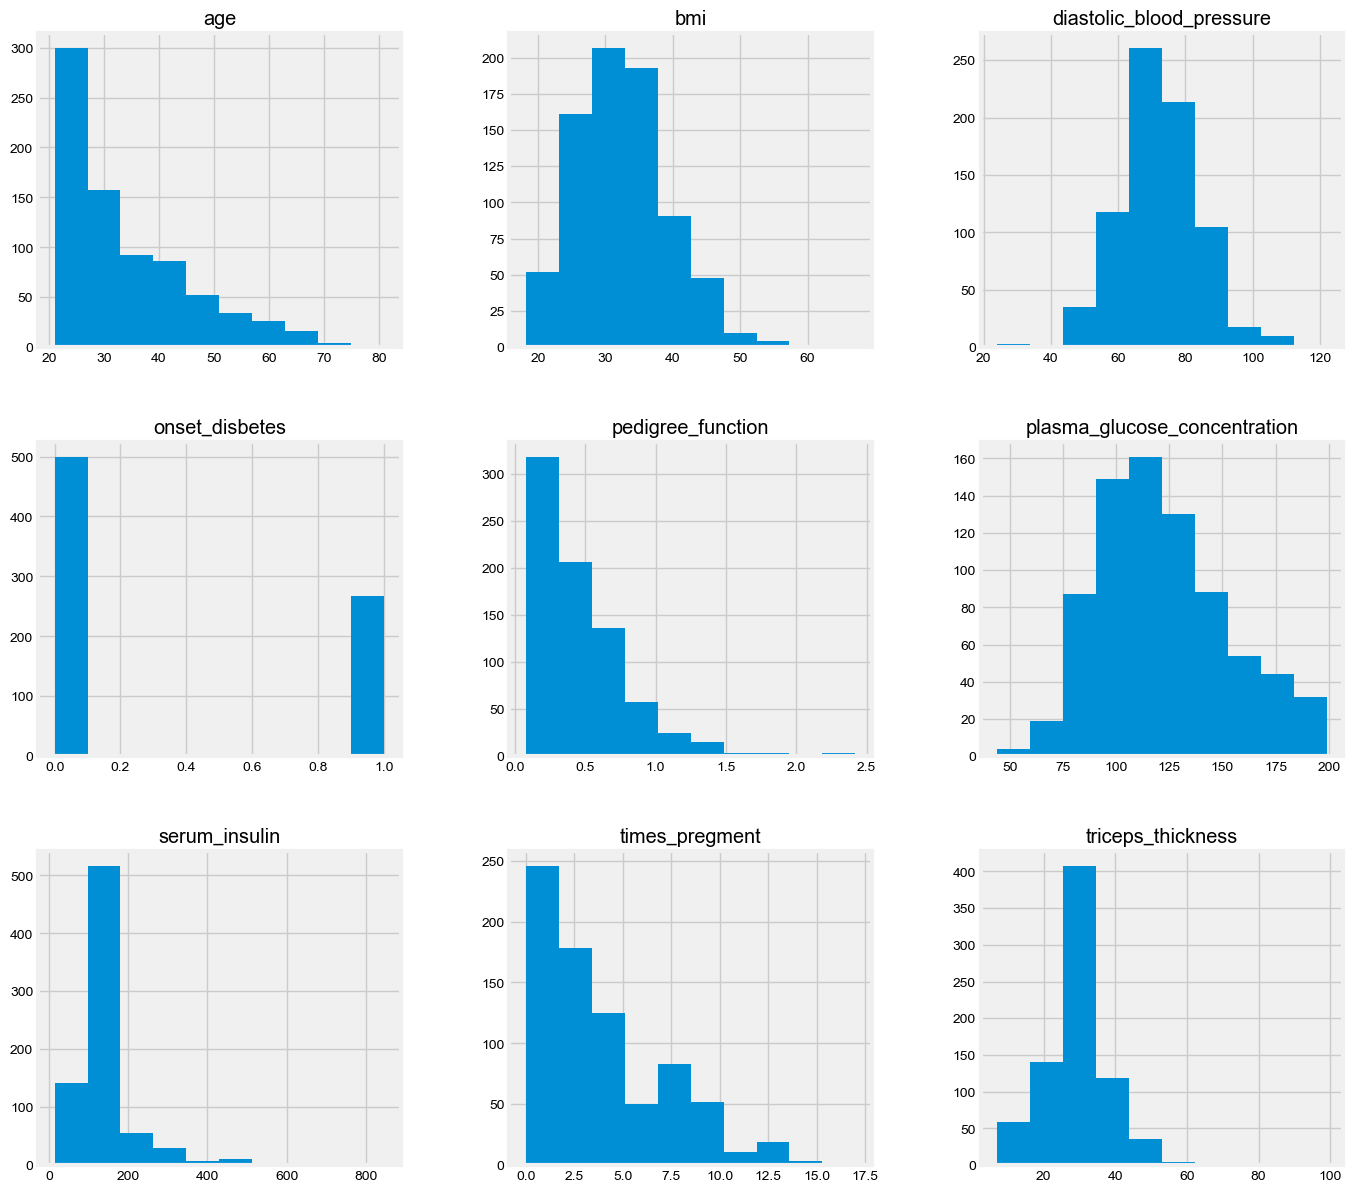

In [73]:
pima_imputed_mean.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124df8f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125004e10>]], dtype=object)

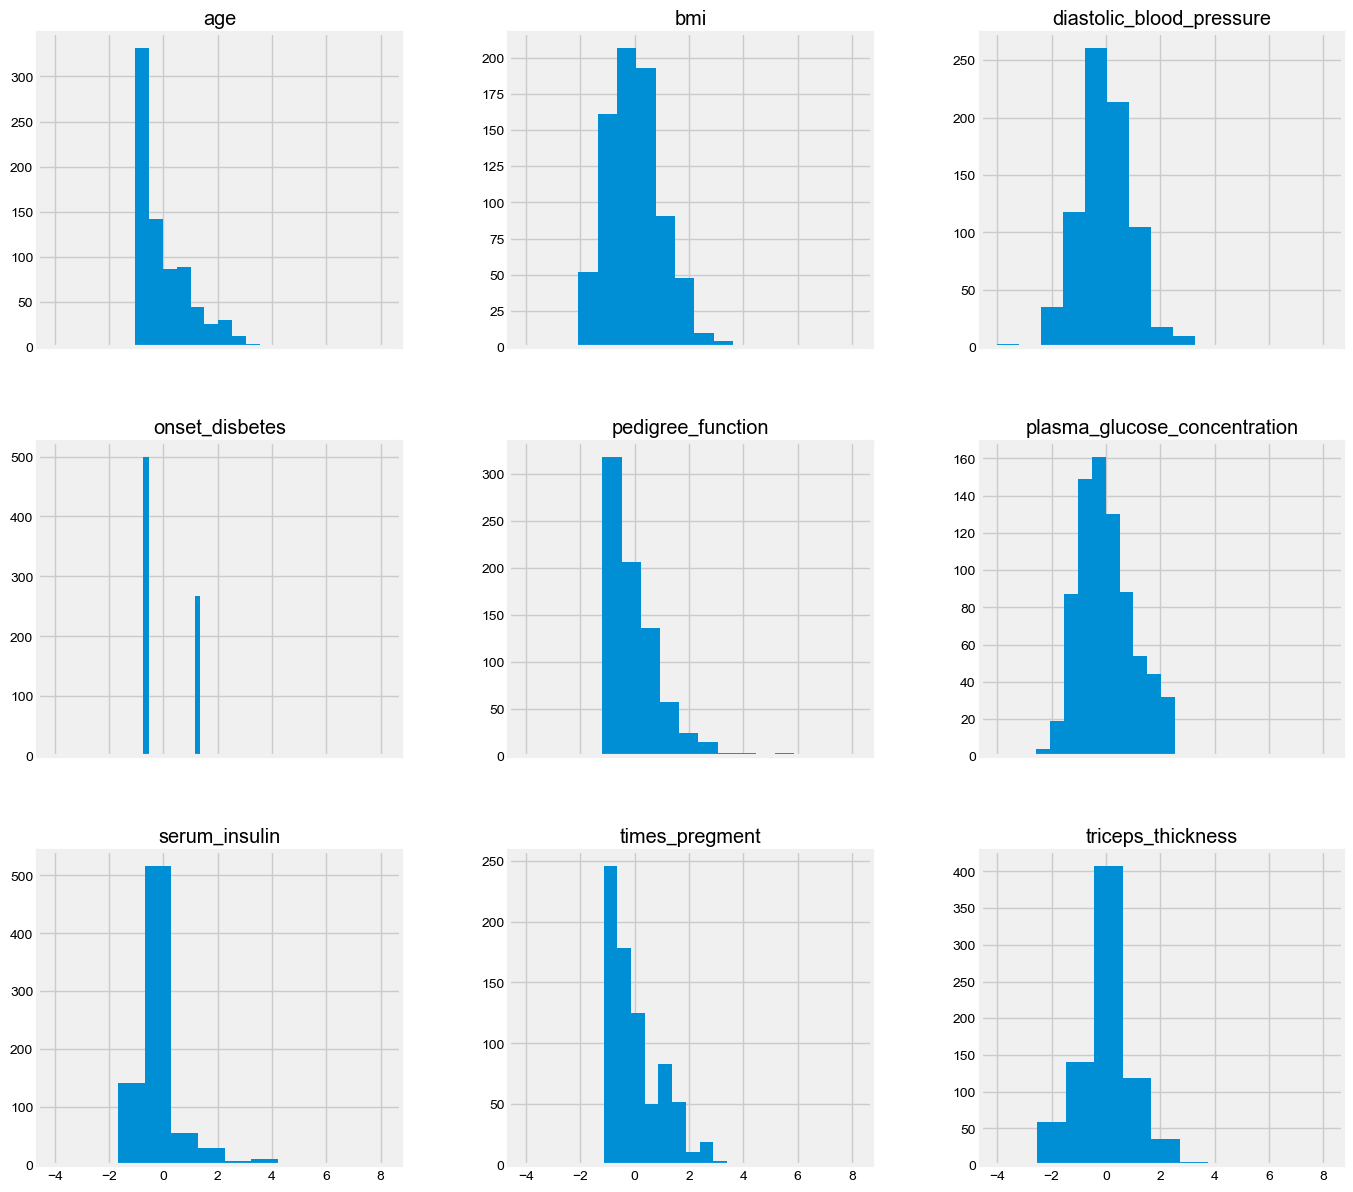

In [86]:
# z分数标准化（单一特征）
from sklearn.preprocessing import StandardScaler
# 实例化方法
scaler = StandardScaler()
glucose_z_score_standarScaler = scaler.fit_transform(pima[['plasma_glucose_concentration']].fillna(-9))
# 可以看看转换之后的均值和标准差是否为0和1
glucose_z_score_standarScaler.mean(), glucose_z_score_standarScaler.std()


# z分数标准化（全部特征）
from sklearn.preprocessing import StandardScaler
# 实例化方法
scaler = StandardScaler()
pima_imputed_mean_scaled = pd.DataFrame(scaler.fit_transform(pima_imputed_mean), columns=pima_columns)
# 看下标准化之后的分布
pima_imputed_mean_scaled.hist(figsize=(15,15), sharex=True)


# 在Pipeline中使用
model = Pipeline([
    ('imputer', Imputer()),
    ('standardize', StandarScaler())
])

In [94]:
# min-max标准化
from sklearn.preprocessing import MinMaxScaler
# 实例化方法
min_max = MinMaxScaler()
# 使用min-max标准化
pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima.fillna(-9)), columns=pima_columns)

In [95]:
# 行归一化
from sklearn.preprocessing import Normalizer
# 实例化方法
normalize = Normalizer()
# 使用行归一化
pima_normalized = pd.DataFrame(normalize.fit_transform(pima.fillna(-9)), columns=pima_columns)
# 查看矩阵的平均范数
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0

## 03 特征构建

In [96]:
# 本次案例使用的数据集
import pandas as pd

X = pd.DataFrame({'city':['tokyo',None,'london','seattle','san fancisco','tokyo'],
                  'boolean':['y','n',None,'n','n','y'],
                  'ordinal_column':['somewhat like','like','somewhat like','like','somewhat like','dislike'],
                  'quantitative_column':[1,11,-.5,10,None,20]})
X

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,somewhat like,1.0
1,n,None,like,11.0
2,None,london,somewhat like,-0.5
3,n,seattle,like,10.0
4,n,san fancisco,somewhat like,NaN
5,y,tokyo,dislike,20.0


### 分类变量处理

In [99]:
# 填充分类变量（基于TransformerMixin的自定义填充器，用众数填充）
from sklearn.base import TransformerMixin

class CustomCategoryzImputer(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0], inplace=True)
        return X
    
    def fit(self, *_):
        return self   
    
    
# 调用自定义的填充器
cci = CustomCategoryzImputer(cols=['city','boolean'])
cci.fit_transform(X)

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,somewhat like,1.0
1,n,tokyo,like,11.0
2,n,london,somewhat like,-0.5
3,n,seattle,like,10.0
4,n,san fancisco,somewhat like,NaN
5,y,tokyo,dislike,20.0


In [105]:
# 填充分类变量（基于Imputer的自定义填充器，用众数填充）
from sklearn.preprocessing import Imputer
class CustomQuantitativeImputer(TransformerMixin):
    def __init__(self, cols=None, strategy='mean'):
        self.cols = cols
        self.strategy = strategy
        
    def transform(self, df):
        X = df.copy()
        impute = Imputer(strategy=self.strategy)
        for col in self.cols:
            X[col] = impute.fit_transform(X[[col]])
        return X
    
    def fit(self, *_):
        return self
    
    
# 调用自定义的填充器
cqi = CustomQuantitativeImputer(cols = ['quantitative_column'], strategy='mean')
cqi.fit_transform(X)

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,somewhat like,1.0
1,n,None,like,11.0
2,None,london,somewhat like,-0.5
3,n,seattle,like,10.0
4,n,san fancisco,somewhat like,8.3
5,y,tokyo,dislike,20.0


In [112]:
# 全部填充
from sklearn.pipeline import Pipeline

imputer = Pipeline([('quant',cqi),
                    ('category',cci)
])

imputer.fit_transform(X)

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,somewhat like,1.0
1,n,tokyo,like,11.0
2,n,london,somewhat like,-0.5
3,n,seattle,like,10.0
4,n,san fancisco,somewhat like,8.3
5,y,tokyo,dislike,20.0


In [107]:
# 类别变量的编码（独热编码）
class CustomDummifier(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cols)
    
    def fit(self, *_):
        return self
    

# 调用自定义的填充器
cd = CustomDummifier(cols=['boolean','city'])
cd.fit_transform(X)

,ordinal_column,quantitative_column,boolean_n,boolean_y,city_london,city_san fancisco,city_seattle,city_tokyo
0,somewhat like,1.0,0,1,0,0,0,1
1,like,11.0,1,0,0,0,0,0
2,somewhat like,-0.5,0,0,1,0,0,0
3,like,10.0,1,0,0,0,1,0
4,somewhat like,NaN,1,0,0,1,0,0
5,dislike,20.0,0,1,0,0,0,1


In [109]:
# 类别变量的编码（标签编码）
class CustomEncoder(TransformerMixin):
    def __init__(self, col, ordering=None):
        self.ordering = ordering
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].map(lambda x: self.ordering.index(x))
        return X
    
    def fit(self, *_):
        return self
    

# 调用自定义的填充器
ce = CustomEncoder(col='ordinal_column', ordering=['dislike','somewhat like','like'])
ce.fit_transform(X)

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,1,1.0
1,n,None,2,11.0
2,None,london,1,-0.5
3,n,seattle,2,10.0
4,n,san fancisco,1,NaN
5,y,tokyo,0,20.0


In [110]:
# 数值变量处理——cut函数
class CustomCutter(TransformerMixin):
    def __init__(self, col, bins, labels=False):
        self.labels = labels
        self.bins = bins
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = pd.cut(X[self.col], bins=self.bins, labels=self.labels)
        return X
    
    def fit(self, *_):
        return self
    

# 调用自定义的填充器
cc = CustomCutter(col='quantitative_column', bins=3)
cc.fit_transform(X)

,boolean,city,ordinal_column,quantitative_column
0,y,tokyo,somewhat like,0.0
1,n,None,like,1.0
2,None,london,somewhat like,0.0
3,n,seattle,like,1.0
4,n,san fancisco,somewhat like,NaN
5,y,tokyo,dislike,2.0


In [113]:
from sklearn.pipeline import Pipeline

# 流水线封装
pipe = Pipeline([('imputer',imputer),
                 ('dummify',cd),
                 ('encode',ce),
                 ('cut',cc)
])

# 训练流水线
pipe.fit(X)

# 转换流水线
pipe.transform(X)

,ordinal_column,quantitative_column,boolean_n,boolean_y,city_london,city_san fancisco,city_seattle,city_tokyo
0,1,0,0,1,0,0,0,1
1,2,1,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0
3,2,1,1,0,0,0,1,0
4,1,1,1,0,0,1,0,0
5,0,2,0,1,0,0,0,1


In [115]:
# 人体胸部加速度数据集,标签activity的数值为1-7
'''
1-在电脑前工作
2-站立、走路和上下楼梯
3-站立
4-走路
5-上下楼梯
6-与人边走边聊
7-站立着说话

'''
df = pd.read_csv('./data/activity_recognizer/1.csv', header=None)
df.columns = ['index','x','y','z','activity']
df.head()

,index,x,y,z,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [120]:
# 扩展数值特征
from sklearn.preprocessing import PolynomialFeatures

x = df[['x','y','z']]
y = df['activity']

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

x_poly = poly.fit_transform(x)
pd.DataFrame(x_poly, columns=poly.get_feature_names()).head()

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1502.0,2215.0,2153.0,2256004.0,3326930.0,3233806.0,4906225.0,4768895.0,4635409.0
1,1667.0,2072.0,2047.0,2778889.0,3454024.0,3412349.0,4293184.0,4241384.0,4190209.0
2,1611.0,1957.0,1906.0,2595321.0,3152727.0,3070566.0,3829849.0,3730042.0,3632836.0
3,1601.0,1939.0,1831.0,2563201.0,3104339.0,2931431.0,3759721.0,3550309.0,3352561.0
4,1643.0,1965.0,1879.0,2699449.0,3228495.0,3087197.0,3861225.0,3692235.0,3530641.0


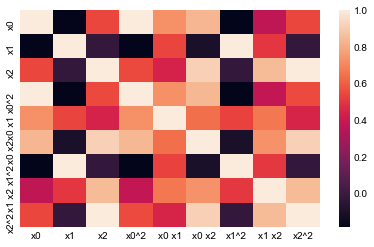

In [121]:
# 查看热力图(颜色越深代表相关性越强)
%matplotlib inline
import seaborn as sns

sns.heatmap(pd.DataFrame(x_poly, columns=poly.get_feature_names()).corr())

In [126]:
# 导入相关库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()

# 在流水线中使用
pipe_params = {'poly_features__degree':[1,2,3],
               'poly_features__interaction_only':[True,False],
               'classify__n_neighbors':[3,4,5,6]}

# 实例化流水线
pipe = Pipeline([('poly_features',poly),
                 ('classify',knn)])

# 网格搜索
grid = GridSearchCV(pipe, pipe_params)
grid.fit(x,y)

print(grid.best_score_, grid.best_params_)

/Users/yongsenlin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.721189408065 {'classify__n_neighbors': 5, 'poly_features__degree': 2, 'poly_features__interaction_only': True}


## 04 特征选择

In [127]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, x, y):
    grid = GridSearchCV(model, 
                        params,
                        error_score=0.)
    grid.fit(x,y)
    
    # 经典的性能指标
    print("Best Accuracy:{}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters:{}".format(grid.best_params_))
    # 拟合的平均时间
    print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    
    # 预测的平均时间
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [128]:
# 导入相关库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier()

# 在流水线中使用
pipe_params = {'poly_features__degree':[1,2,3],
               'poly_features__interaction_only':[True,False],
               'classify__n_neighbors':[3,4,5,6]}

# 实例化流水线
pipe = Pipeline([('poly_features',poly),
                 ('classify',knn)])

# 网格搜索
get_best_model_and_accuracy(pipe, pipe_params, x, y)

/Users/yongsenlin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best Accuracy:0.7211894080651812
Best Parameters:{'classify__n_neighbors': 5, 'poly_features__degree': 2, 'poly_features__interaction_only': True}
Average Time to Fit (s):0.246
Average Time to Score (s):0.69


### 信用卡逾期数据集

In [130]:
import pandas as pd
import numpy as np

np.random.seed(123)

credit_card_default = pd.read_csv('./data/credit_card_default.csv')
credit_card_default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [136]:
# 重命名一下y特征
credit_card_default = credit_card_default.rename(columns={'default payment next month':'target'})

x = credit_card_default.drop('target', axis=1)
y = credit_card_default['target']
# 空准确度 77.88%
y.value_counts()/len(y)

0    0.7788
1    0.2212
Name: target, dtype: float64

In [133]:
# 导入相关模型包
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [134]:
# 设置网格搜索的范围
# 逻辑回归
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1','l2']}
# KNN
knn_params = {'n_neighbors':[1,3,5,7]}
# 决策树
tree_params = {'max_depth':[None,1,3,5,7,9]}
# 随机森林
rf_params = {'n_estimators':[10,50,100], 'max_depth':[None,1,3,5,7,9]}

# 初始化模型
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [143]:
# 皮尔逊相关系数 挑选变量（保留相关系数绝对值大于0.2的）
fs1 = credit_card_default.columns[credit_card_default.corr()['target'].abs()>.2].drop('target')
x_selected = x[fs1]
x_selected.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [152]:
# 皮尔逊相关系数 挑选变量（在Pipeline中实现）
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep =[], threshold=None):
        # 保存target
        self.response = response
        # 保存阈值
        self.threshold = threshold
        # 初始化一个变量用于保存特征名
        self.cols_to_keep = cols_to_keep
        
    def transform(self, x):
        return x[self.cols_to_keep]
    
    def fit(self, x, *_):
        df = pd.concat([x, self.response], axis=1)
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs()>self.threshold]
        self.cols_to_keep = [c for c in self.cols_to_keep if c in x.columns]
        return self
    
    
# 调用方法
ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(x)
# 查看保留的变量
ccc.cols_to_keep
# 查看转换的变量
ccc.transform(x).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [169]:
# 假设检验 挑选变量（保留p值小于0.05的）
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k_best = SelectKBest(f_classif, k=5)
k_best.fit_transform(x,y)

# 查看挑选的变量
p_values = pd.DataFrame({'column':x.columns,
                         'p_value':k_best.pvalues_}).sort_values('p_value')

p_values[p_values['p_value']<.05]

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157
17,PAY_AMT1,1.146488e-36
18,PAY_AMT2,3.166657e-24
20,PAY_AMT4,6.830942e-23


## 05 特征转换

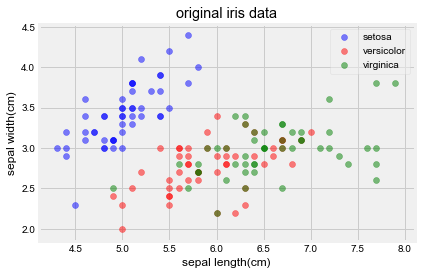

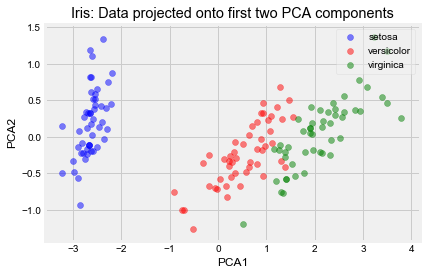

In [183]:
# PCA的使用
# 导入相关库
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# 导入数据集
iris = load_iris()
iris_x, iris_y = iris.data, iris.target

# 实例化方法
pca = PCA(n_components=2)
# 训练方法
pca.fit(iris_x)
pca.transform(iris_x)[:5,]

# 自定义一个可视化的方法
label_dict = {i:k for i,k in enumerate(iris.target_names)}
def plot(x,y,title,x_label,y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^','s','o'),('blue','red','green')):
        plt.scatter(x=x[:,0].real[y == label],
                   y = x[:,1].real[y == label],
                   color = color,
                   alpha = 0.5,
                   label = label_dict[label]
                   )
        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

# 可视化
plot(iris_x, iris_y,"original iris data","sepal length(cm)","sepal width(cm)")
plt.show()

plot(pca.transform(iris_x), iris_y,"Iris: Data projected onto first two PCA components","PCA1","PCA2")

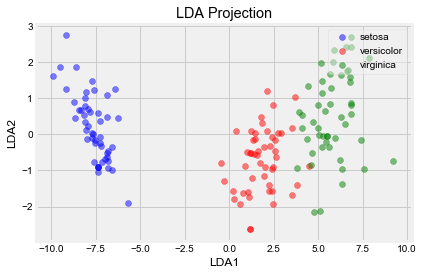

In [184]:
# LDA的使用
# 导入相关库
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 实例化LDA模块
lda = LinearDiscriminantAnalysis(n_components=2)
# 训练数据
x_lda_iris = lda.fit_transform(iris_x, iris_y)
# 可视化
plot(x_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")

## 06 特征学习

In [192]:
# RBM的使用
# 我们使用MNIST数据集来讲解
# 导入相关库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

# 导入数据集
images = np.genfromtxt('./data/mnist_train.csv', delimiter=',')
print(images.shape)
# 划分数据
images_x, images_y = images[:,1:], images[:,0]

# 缩放特征到0-1
images_x = images_x/255.

# 用RBM学习新特征
rbm = BernoulliRBM(random_state=0)
lr = LogisticRegression()

# 设置流水线的参数范围
params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components':[100, 200]
         }
# 创建流水线
pipeline = Pipeline([('rbm', rbm),
                     ('clf', lr)])
# 实例化网格搜索类
grid = GridSearchCV(pipeline, params)
# 拟合数据
grid.fit(images_x, images_y)
# 返回最佳参数
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'rbm__n_components': 200}, 0.91833333333333333)